In [40]:
#Importing useful packages
import sqlite3
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

'''%matplotlib inline

import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize'''

#Change to path of databases
path ='F:/Summer Project/Data/Taxi/'
    
#Returns a Dataframe containing a sample of size "number" from the specified month and year
def get_sample(year,month,number,query="where"):
    #Error Checking
    if number < 0:
        print("Bad Number Value\n")
        return
    if year < 2012 | year > 2014:
        print("Bad year value\n")
        return
    
    #Change to directory of your database!
    conn = sqlite3.connect(path+'yellow_taxi_'+str(year)+'.sqlite')
    c = conn.cursor()
    #For small samples (less than 10000) adding them this way is fastest
    if number<10000:
        sample = pd.read_sql_query('select * from '+str(month)+
                                   ' '+query+' rowid = (abs(random()) % (select (select max(rowid) from '+str(month)+')+1))',conn)
        #for i in range(number-1):
        while len(sample)<number:
            sample = sample.append(pd.read_sql_query('select * from '+str(month)+
                                                     ' '+query+' rowid = (abs(random()) % (select (select max(rowid) from '+str(month)+')+1))',conn))#row,ignore_index=True)
    else:
        #This is the fastest way to get a random sample for large entries
        if query=="where":
            sample = pd.read_sql_query('select * from '+str(month)+' order by random() limit '+str(number),conn)
        else:
            sample = pd.read_sql_query('select * from '+str(month)+' '+query[:-3]+' order by random() limit '+str(number),conn)
    
    #Turns the dropoff_datetime column into an array of time values
    tmpdate = sample['dropoff_datetime'].get_values()
    pickuptmp = sample['pickup_datetime'].get_values()
    distance = sample['trip_distance'].get_values()
    
    #Initiliazing three arrays that will be our new columns in our sample
    num=len(sample)
    dropoff_hour = [0]*(num)
    dropoff_day = [0]*(num)
    day_of_week = [0]*(num)
    time_in_taxi = [0]*(num)
    avg_speed = [0]*(num)
        
    #Loop that will strip the time from every entry in tmpdate and assign it to the right column
    for i in range(len(distance)):
        tmp = datetime.strptime(tmpdate[i], '%Y-%m-%d %H:%M:%S')
        tmp2 = datetime.strptime(pickuptmp[i],'%Y-%m-%d %H:%M:%S')
        #print("Times:" +str(tmp)+" - "+ str(tmp2))
        #print(tmp-tmp2)
        dropoff_hour[i] = tmp.hour
        dropoff_day[i] = tmp.day
        day_of_week[i] = tmp.weekday()
        tmp3 = tmp-tmp2
        time_in_taxi[i] = (tmp3.seconds//60)# + tmp3.hour*60
        if distance[i] == 0:
            avg_speed[i] = 0
        elif time_in_taxi[i] == 0:
            avg_speed[i] = 0
        else:
            avg_speed[i] = (distance[i]/time_in_taxi[i])*60
    
    #Creating the new columns for our sample
    sample['dropoff_hour'] = dropoff_hour
    sample['dropoff_day'] = dropoff_day
    sample['weekday'] = day_of_week
    sample['time_in_taxi'] = time_in_taxi
    sample['average_mph'] = avg_speed
    #if sample['trip_distance']/sample['time_in_taxi'] > 60:
    #    print("Taxi was going " +str())
    #Returning the sample
    return sample


'''def plot_sample(sample):
    fig, ax = plt.subplots(figsize=(10,20))
    m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            lat_0=40.75, lon_0=-73.9,
            llcrnrlon=-74.05, llcrnrlat= 40.56, urcrnrlon=-73.8, urcrnrlat=40.9)
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
    m.drawcoastlines()
    m.readshapefile('nyct2010_16a/nyct2010a','areas')
    
    x, y = m(sample['pickup_longitude'].values,sample['pickup_latitude'].values)
    m.plot(x,y,'o',markersize=6,color='g',aplha=.8)
    
    x2, y2 = m(sample['dropoff_longitude'].values,sample['dropoff_latitude'].values)
    m.plot(x2,y2,'o',markersize=6,color='r',alpha=.8)
    #sample.ix[0,6],sample.ix[0,5],markersize=5)
    return'''
    
def year_sample(year,number,query="where"):
    #Error Checking
    if number < 0:
        print("Bad Number Value\n")
        return
    if year < 2012 | year > 2014:
        print("Bad year value\n")
        return
    months = ["january","february","march","april","may","june","july","august","september","october","november","december"]
    
    #Change to directory of your database!
    conn = sqlite3.connect(path+'yellow_taxi_'+str(year)+'.sqlite')
    c = conn.cursor()
    count = 0
    for i, month in enumerate(months,start=1):
        #For small samples (less than 10000) adding them this way is fastest
        if count == 0:
            count = 1
            sample1 = pd.read_sql_query('select * from '+str(month)+
                                       ' '+query+' rowid = (abs(random()) % (select (select max(rowid) from '+str(month)+')+1))',conn)
        if number<10000:
            #sample1 = pd.read_sql_query('select * from '+str(month)+
            #                           ' '+query+' rowid = (abs(random()) % (select (select max(rowid) from '+str(month)+')+1))',conn)
            #for i in range(number-1):
            while len(sample1)<(number*i):
                sample1 = sample1.append(pd.read_sql_query('select * from '+str(month)+
                                                         ' '+query+' rowid = (abs(random()) % (select (select max(rowid) from '+str(month)+')+1))',conn))#row,ignore_index=True)
        else:
            #This is the fastest way to get a random sample for large entries
            if query=="where":
                sample1 = sample1.append(pd.read_sql_query('select * from '+str(month)+' order by random() limit '+str(number),conn))    
            else:
                sample1 = sample1.append(pd.read_sql_query('select * from '+str(month)+' order by random() limit '+str(number),conn))
                    

    #Turns the dropoff_datetime column into an array of time values
    tmpdate = sample1['dropoff_datetime'].get_values()
    pickuptmp = sample1['pickup_datetime'].get_values()
    distance = sample1['trip_distance'].get_values()

    #Initiliazing three arrays that will be our new columns in our sample
    num=len(sample1)
    dropoff_hour = [0]*(num)
    dropoff_day = [0]*(num)
    day_of_week = [0]*(num)
    time_in_taxi = [0]*(num)
    avg_speed = [0]*(num)

    #Loop that will strip the time from every entry in tmpdate and assign it to the right column
    for i in range(len(distance)):
        tmp = datetime.strptime(tmpdate[i], '%Y-%m-%d %H:%M:%S')
        tmp2 = datetime.strptime(pickuptmp[i],'%Y-%m-%d %H:%M:%S')
        #print("Times:" +str(tmp)+" - "+ str(tmp2))
        #print(tmp-tmp2)
        dropoff_hour[i] = tmp.hour
        dropoff_day[i] = tmp.day
        day_of_week[i] = tmp.weekday()
        tmp3 = tmp-tmp2
        time_in_taxi[i] = (tmp3.seconds//60)# + tmp3.hour*60
        if distance[i] == 0:
            avg_speed[i] = 0
        elif time_in_taxi[i] == 0:
            avg_speed[i] = 0
        else:
            avg_speed[i] = (distance[i]/time_in_taxi[i])*60

    #Creating the new columns for our sample
    sample1['dropoff_hour'] = dropoff_hour
    sample1['dropoff_day'] = dropoff_day
    sample1['weekday'] = day_of_week
    sample1['time_in_taxi'] = time_in_taxi
    sample1['average_mph'] = avg_speed
    #if sample['trip_distance']/sample['time_in_taxi'] > 60:
    #    print("Taxi was going " +str())
    #Returning the sample
    return sample1

In [39]:
#Example of get_sample - *note that the query must start with "where" and end with "and"
#x = get_sample(2013,"december",500,"where trip_distance<5 and")
x = year_sample(2013,100)
#print(x)
#This will print out the sample to a csv file so it can be loaded into JMP or other software
x.to_csv('output6.csv')


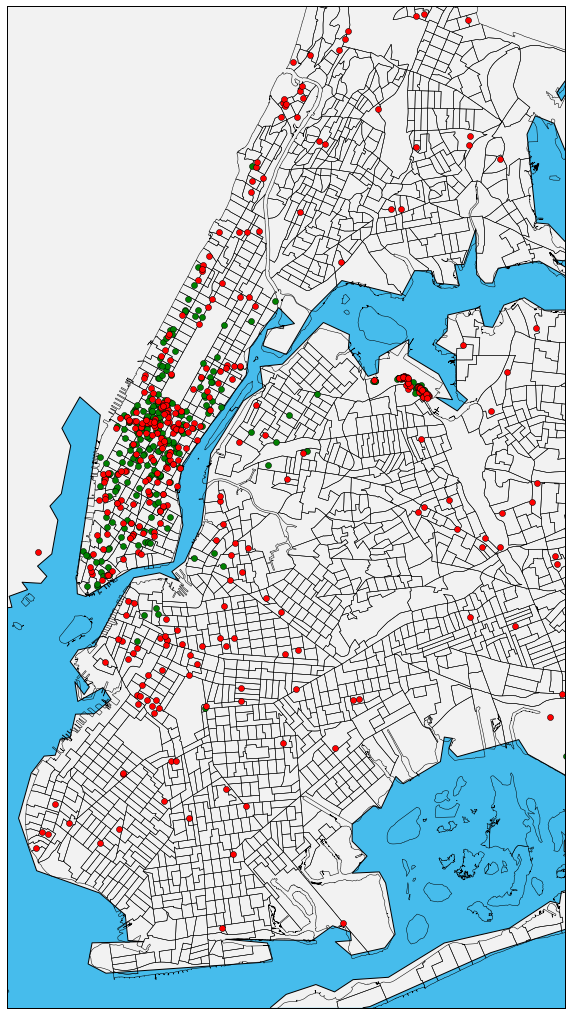

In [12]:
plot_sample(get_sample(2013,"january",500,"where trip_distance>10 and"))

In [2]:
import sqlite3
conn = sqlite3.connect(r'F:\Summer Project\Data\Taxi\yellow_taxi_2013.sqlite')
c = conn.cursor()
    
c.execute("create index total_index on december (total_amount)")